<a href="https://colab.research.google.com/github/juametri/Data-Analysis-/blob/main/proyecto_AD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga y exploracion inicial

##Cargar y leer los datos

In [ ]:
# con este codigo lo unicpo que hago es que importo las librerias que voy a estar usando y los datos meteorologicos y los guardo en el dataframe datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

datos = pd.read_csv('datos_meteorologicos_simulados.csv')  # leo los datos y los guardo en el dataframe datos
datos.head(10)  # muestro los primeros 10 datos para ver que columnas tengo

,Fecha,Temperatura_Maxima_C,Temperatura_Minima_C,Precipitacion_mm,Humedad_Relativa_%
0,2023-01-01,28.5,13.0,0.1,88.1
1,2023-01-02,24.0,16.1,12.3,73.6
2,2023-01-03,29.5,15.1,0.6,73.9
3,2023-01-04,35.7,15.5,4.3,76.8
4,2023-01-05,23.4,11.1,1.6,64.2
5,2023-01-06,23.4,15.1,4.0,80.9
6,2023-01-07,36.1,17.5,5.3,71.1
7,2023-01-08,30.4,22.3,8.9,79.5
8,2023-01-09,21.7,19.8,1.2,68.0
9,2023-01-10,28.8,25.8,0.1,83.2


##Informacion del dataframe
De esta forma puedo ver cuantos datos nulos puede haber y donde estan ademas puedo ver que tipo de informacion contiene cada columna

In [ ]:
datos.info()
datos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 365 non-null    object 
 1   Temperatura_Maxima_C  355 non-null    float64
 2   Temperatura_Minima_C  365 non-null    float64
 3   Precipitacion_mm      355 non-null    float64
 4   Humedad_Relativa_%    355 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


(365, 5)

## Calcular estadísticas básicas para columnas numéricas y describir columnas categóricas si es que las hay.

In [ ]:
columnas_categoricas = datos.select_dtypes(include=['object']).columns  # con esta linea de codigo seleccionamos todas las columnas que tengan informacion del tipo "objet", que en este caso es fevha
display(datos.describe())   #mostramos algunos datos basicos de el dataframe
display(columnas_categoricas) #vemos cuales son las columnas categoricas

,Temperatura_Maxima_C,Temperatura_Minima_C,Precipitacion_mm,Humedad_Relativa_%
count,355.000000,365.000000,355.000000,355.000000
mean,25.178873,14.810959,5.235775,69.880282
std,6.516813,5.098728,5.208944,9.918613
min,6.700000,1.500000,0.000000,41.100000
25%,20.450000,11.200000,1.350000,63.000000
50%,25.400000,14.700000,3.800000,70.200000
75%,29.400000,18.200000,7.400000,76.100000
max,52.000000,30.400000,30.900000,99.700000


Index(['Fecha'], dtype='object')

##Detección de valores nulos

In [ ]:
display(datos.isnull().sum())  #nos dice cuantos valoes nulos tenemos en cada columna

,0
Fecha,0
Temperatura_Maxima_C,10
Temperatura_Minima_C,0
Precipitacion_mm,10
Humedad_Relativa_%,10


##Detección de outliers por columna

In [ ]:
columnas_numericas = datos.select_dtypes(include='number').columns
print(f"Columnas numéricas encontradas: {list(columnas_numericas)}")

Columnas numéricas encontradas: ['Temperatura_Maxima_C', 'Temperatura_Minima_C', 'Precipitacion_mm', 'Humedad_Relativa_%']


In [ ]:
outliers_info = []

for columna in columnas_numericas:

    # Calcular cuartiles
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar outliers
    outliers_count = datos[(datos[columna] < limite_inferior) | (datos[columna] > limite_superior)].shape[0]

    # Guardar resultados
    outliers_info.append({
        'Columna': columna,
        'Outliers': outliers_count
    })

# Crear y mostrar el DataFrame con los resultados
mostrar = pd.DataFrame(outliers_info)
display(mostrar)


,Columna,Outliers
0,Temperatura_Maxima_C,3
1,Temperatura_Minima_C,1
2,Precipitacion_mm,16
3,Humedad_Relativa_%,3


#Limpieza de datos

## visualizacion de outliers antes de quitarlos

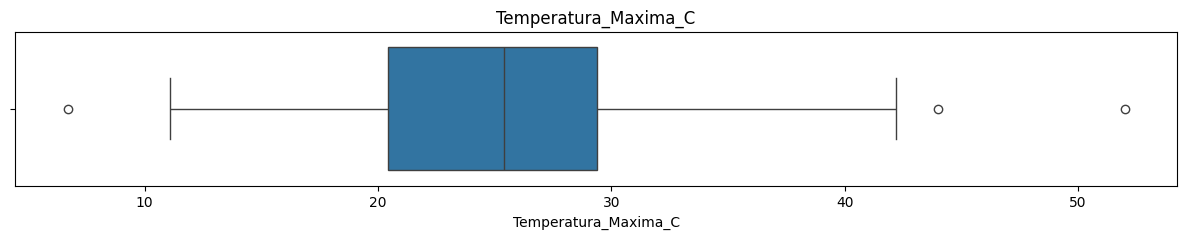

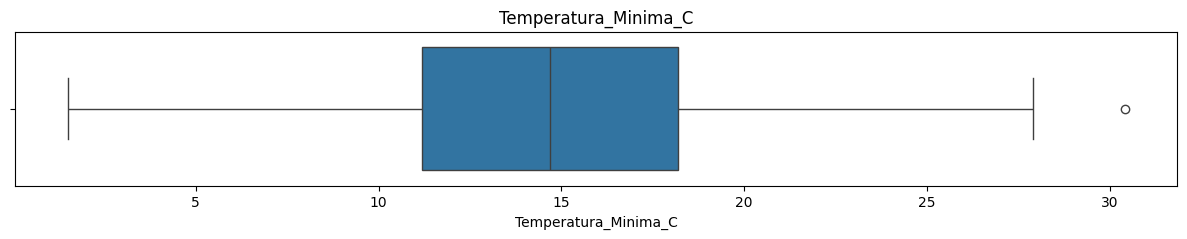

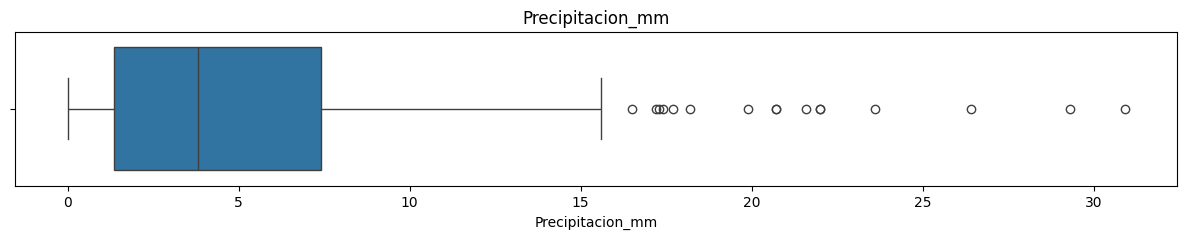

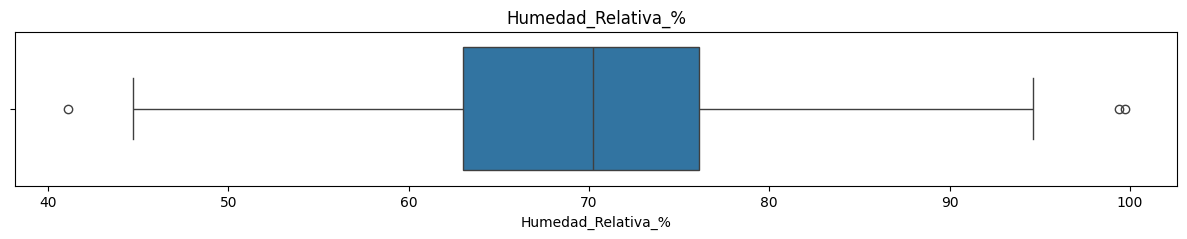

In [ ]:
for columna in columnas_numericas:
  plt.figure(figsize=(15, 2))
  plt.title(columna)
  sns.boxplot(x=datos[columna])
  plt.show()

##Tratamiento de valores nulos y de outliers con eliminación o imputación.

In [ ]:
datos_filtrados = datos.copy()

# de esta forma escribo que no tengo informacion de las fechas
datos_filtrados["Fecha"] = datos_filtrados["Fecha"].fillna("sin informacion")

# separo a todas las columnas que manejen valores numericos
a = datos_filtrados.select_dtypes(include='number').columns

# si no tengo alguna informacion cambio el NaN por la media medida de los datos
datos_filtrados[a] = datos_filtrados[a].fillna(datos_filtrados[a].mean())

# aqui voy a guardar los outliers
outliers_info = []

for columna in columnas_numericas:

    # calculo los cuartiles y los limites para luego eliminar lo que se salga de ahi
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # cuento los outliers
    outliers_count = datos_filtrados[(datos_filtrados[columna] < limite_inferior) | (datos_filtrados[columna] > limite_superior)].shape[0]


    # Si no hay outliers nisiquiera se calcula la mediana de la columna
    if outliers_count > 0:

      # elimino los cuartiles
      mediana = datos_filtrados[columna].median()
      datos_filtrados[columna] = datos_filtrados[columna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

##Mostrar el número de elementos nulos y outliers por columna del DataFrame limpio

In [ ]:
display(datos_filtrados.isnull().sum())

#datos_filtrados = datos.copy()

outliers_info = []

for columna in columnas_numericas:

   # Calcular cuartiles y los limites para luego eliminar lo que se salga de ahi
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR


    # Contar outliers
    outliers_count = datos_filtrados[(datos_filtrados[columna] < limite_inferior) | (datos_filtrados[columna] > limite_superior)]

    # Guardar resultados
    outliers_info.append({
        'Columna': columna,
        'Outliers': outliers_count.shape[0]
    })



mostrar = pd.DataFrame(outliers_info)
display(mostrar)

,0
Fecha,0
Temperatura_Maxima_C,0
Temperatura_Minima_C,0
Precipitacion_mm,0
Humedad_Relativa_%,0


,Columna,Outliers
0,Temperatura_Maxima_C,0
1,Temperatura_Minima_C,0
2,Precipitacion_mm,0
3,Humedad_Relativa_%,0


# Verificar inconsistencias
lo meto aqui antes de hacer el analisis visual para ver que no halla nada raro

##Ver que exista una temperatura minima mayor a una temperatura maxima

In [ ]:
inconsistencias = (datos_filtrados["Temperatura_Minima_C"]  >= datos_filtrados['Temperatura_Maxima_C'])
display(inconsistencias.sum())

if inconsistencias.sum() > 0:
  # pense que como los datos que tenian inconsistencias eran muchos solo los cambie para no quitar mucha informacion
  datos_filtrados.loc[inconsistencias, 'Temperatura_Maxima_C'], datos_filtrados.loc[inconsistencias, 'Temperatura_Minima_C'] = datos_filtrados.loc[inconsistencias, 'Temperatura_Minima_C'], datos_filtrados.loc[inconsistencias, 'Temperatura_Maxima_C']

np.int64(0)

## Verificar que no haya % de humedad mayores al 100% o menores de 0

In [ ]:
inconsistencias = (datos_filtrados["Humedad_Relativa_%"]  > 100) | (datos_filtrados['Humedad_Relativa_%'] < 0)
display(inconsistencias.sum())
# aqui me doy cuenta que no hay ninguna presion que cumpla esa condicion

np.int64(0)

## Voy a verificar que no haya ninguna precipiracion negativa

In [ ]:
inconsistencias = (datos_filtrados["Precipitacion_mm"] < 0)
display(inconsistencias.sum())
# como no hay niguna, no hago nada

np.int64(0)

## Normalizar / Estandarizar los datos.

In [ ]:
columnas_numericas = ["Precipitacion_mm", "Temperatura_Maxima_C", "Temperatura_Minima_C"]

scaler = StandardScaler()

datos_e = datos_filtrados.copy()
datos_filtrados[columnas_numericas] = scaler.fit_transform(datos_filtrados[columnas_numericas])

print("\nDataFrame después de escalar las columnas numéricas:")
display(datos_filtrados)


DataFrame después de escalar las columnas numéricas:


,Fecha,Temperatura_Maxima_C,Temperatura_Minima_C,Precipitacion_mm,Humedad_Relativa_%
0,2023-01-01,0.523670,-0.294312,-1.183968,88.1
1,2023-01-02,-0.265979,0.378201,2.117027,73.6
2,2023-01-03,0.699148,0.161261,-1.048682,73.9
3,2023-01-04,1.787110,0.248037,-0.047560,76.8
4,2023-01-05,-0.371266,-0.706497,-0.778108,64.2
...,...,...,...,...,...
360,2023-12-27,0.541218,-0.055679,-0.967510,58.1
361,2023-12-28,1.787110,0.161261,-1.048682,69.6
362,2023-12-29,-0.230884,0.508364,0.168899,81.7
363,2023-12-30,0.400836,-0.446170,0.439472,61.4


#Analisis visual

##Grafica del como se comportaron los datos durante el tiepo de estudio
de esta forma podemos ver mas o menos la temperatura maxima minima la precipitacion y el porcentaje de humedad que mas se repiten y nos damos una idea de el clima en el tiempo de estudio

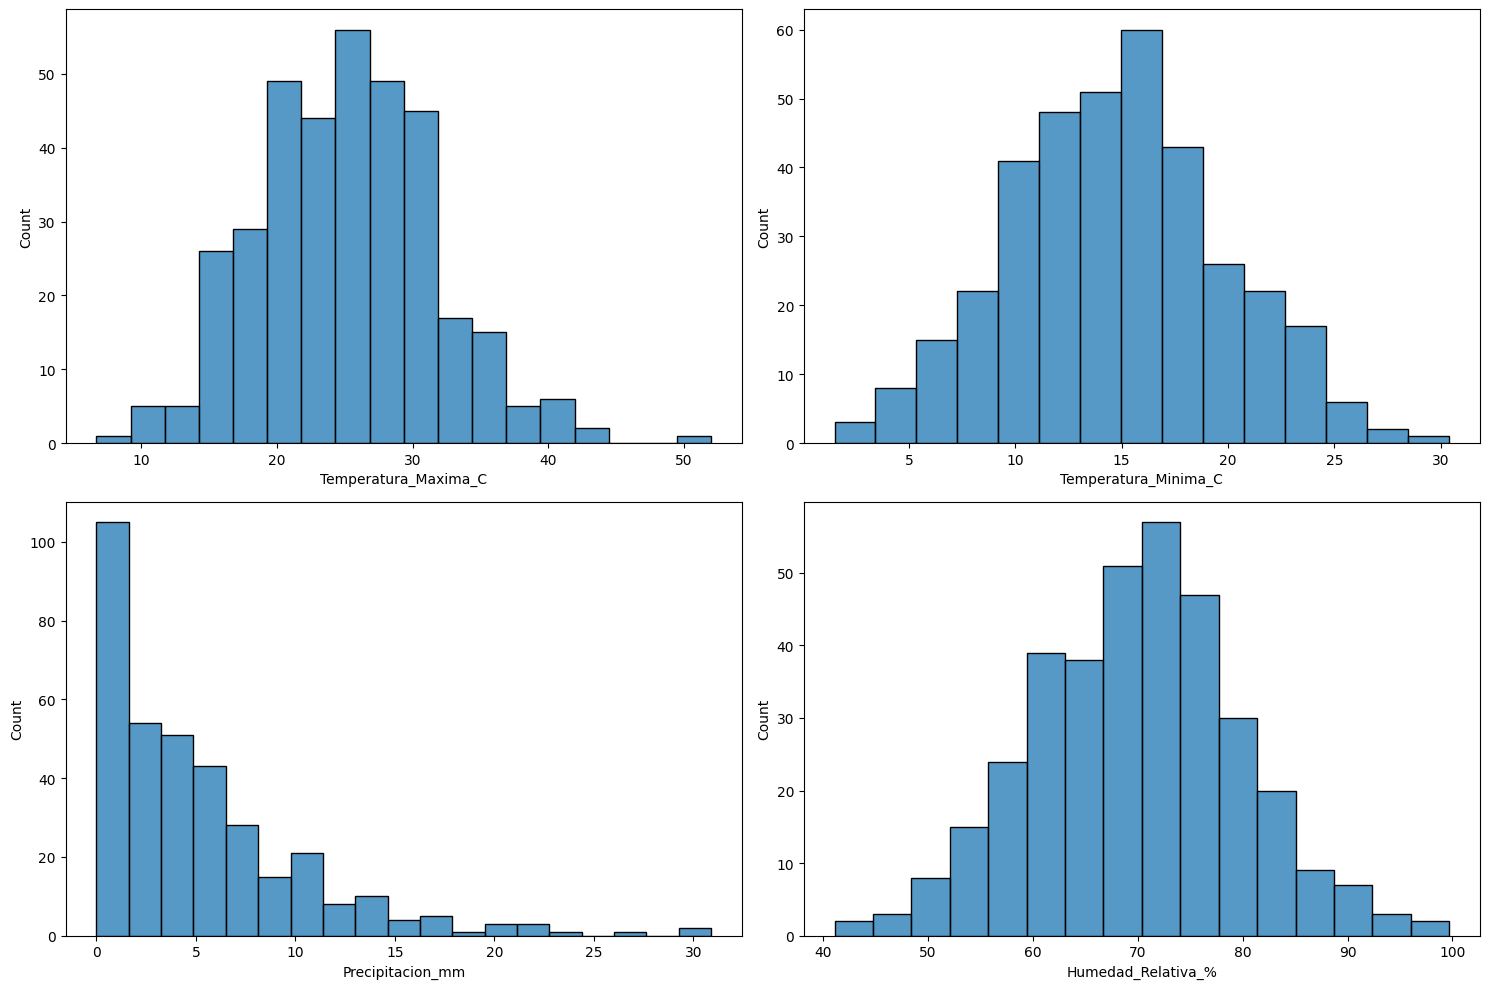

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


sns.histplot(data=datos, x='Temperatura_Maxima_C', ax=axes[0,0])
sns.histplot(data=datos, x='Temperatura_Minima_C', ax=axes[0,1])
sns.histplot(data=datos, x='Precipitacion_mm', ax=axes[1,0])
sns.histplot(data=datos, x='Humedad_Relativa_%', ax=axes[1,1])
plt.tight_layout()


## Mapa de calor de las correlaciones

Text(0.5, 1.0, 'Correlación entre Características')

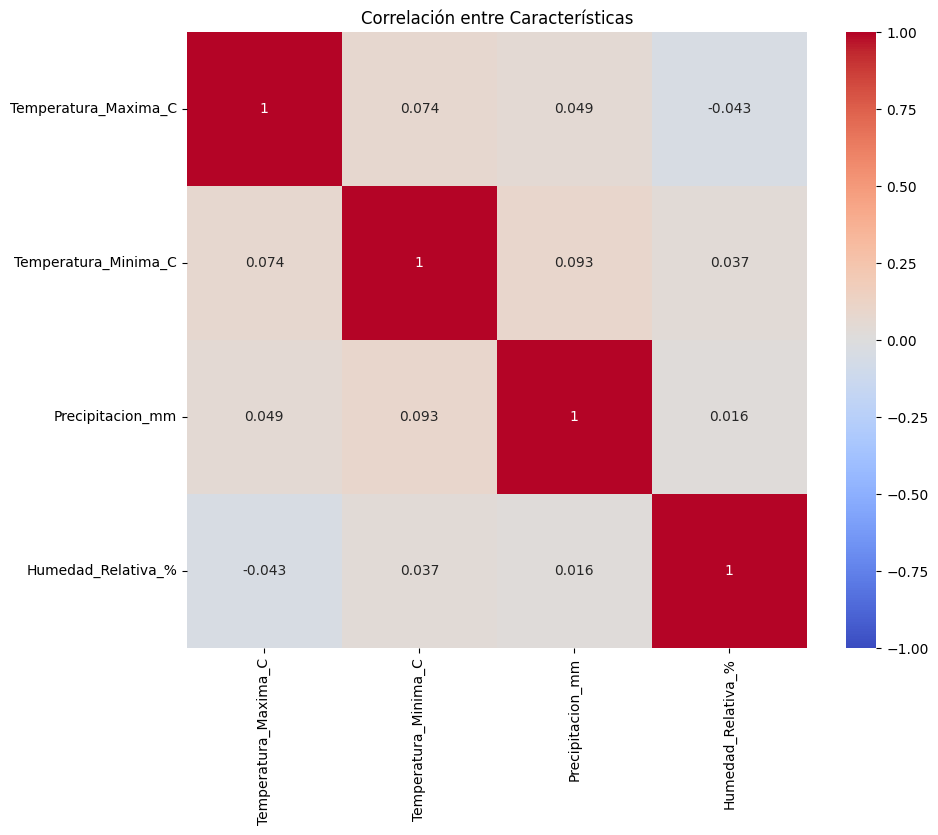

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = datos_filtrados.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre Características')

## Visualizacion de la precipitacion atraves de tiempo


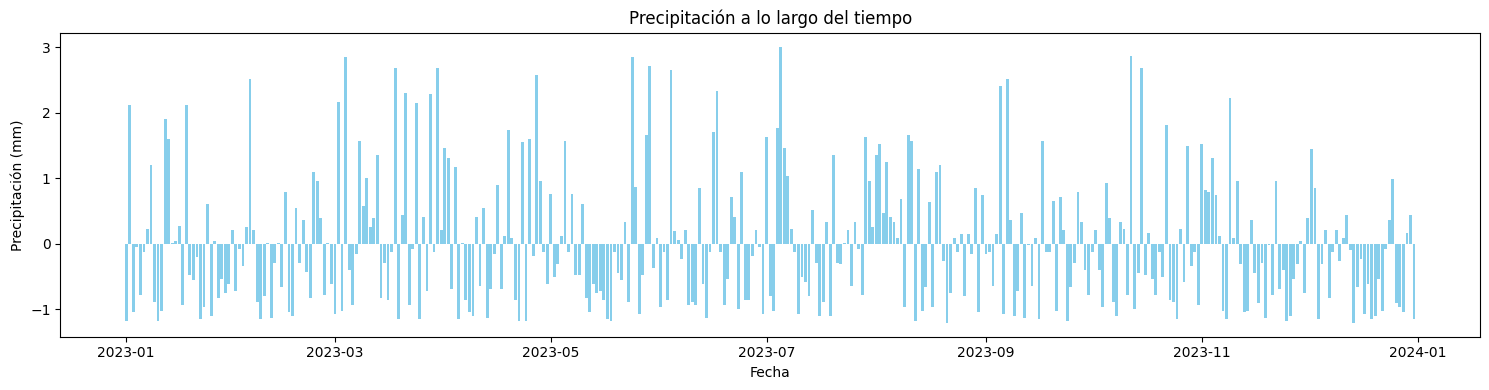

In [ ]:
datos_filtrados = datos_filtrados.sort_values('Fecha')

plt.figure(figsize=(15,4))
plt.bar(datos_filtrados['Fecha'], datos_filtrados['Precipitacion_mm'], color='skyblue')
plt.title('Precipitación a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.tight_layout()

plt.show()

## Visualizacion de la temperatura maxima atraves del tiempo

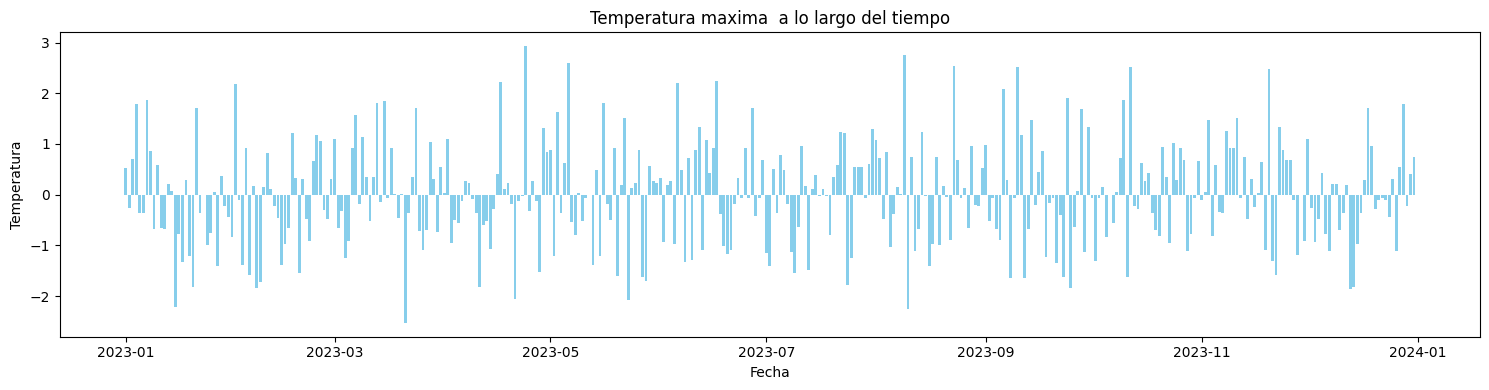

In [ ]:
datos_filtrados = datos_filtrados.sort_values('Fecha')

plt.figure(figsize=(15,4))
plt.bar(datos_filtrados['Fecha'], datos_filtrados['Temperatura_Maxima_C'], color='skyblue')
plt.title('Temperatura maxima  a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.tight_layout()

plt.show()

## Visualizacion de la temperatura maxima atraves del tiempo




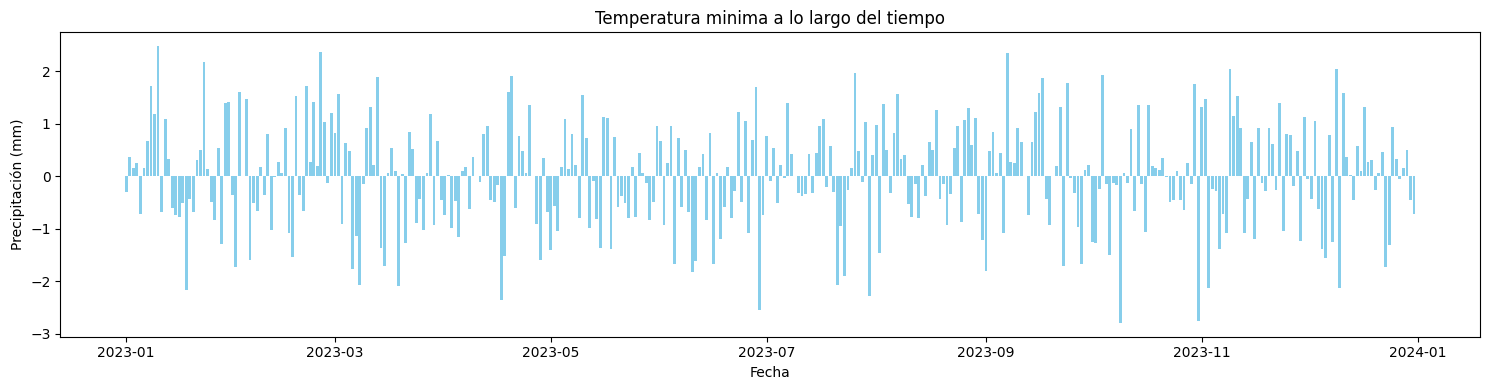

In [ ]:
datos_filtrados = datos_filtrados.sort_values('Fecha')

plt.figure(figsize=(15,4))
plt.bar(datos_filtrados['Fecha'], datos_filtrados['Temperatura_Minima_C'], color='skyblue')
plt.title('Temperatura minima a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.tight_layout()

plt.show()

## Visualizacion de la humedad relativa atraves del tiempo

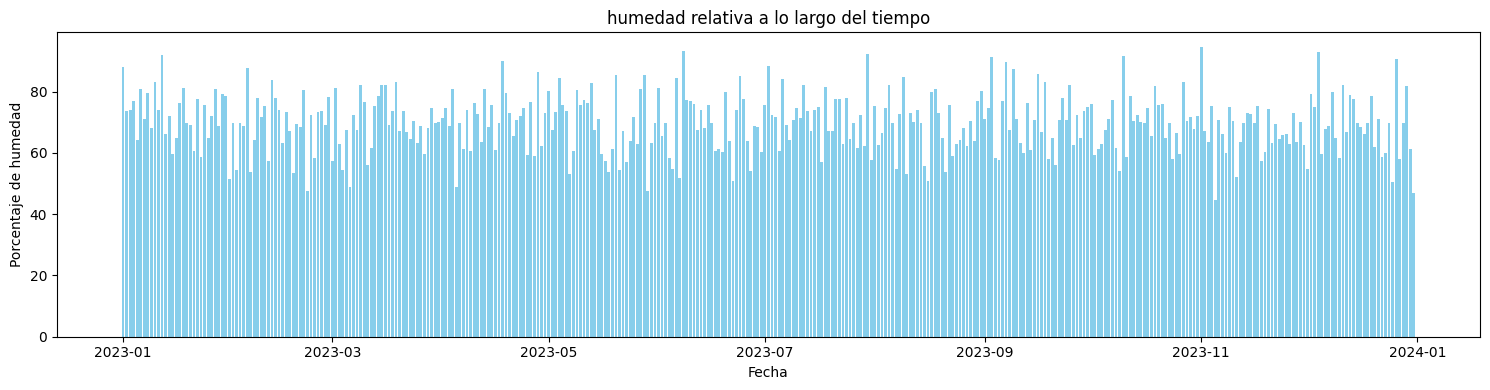

In [ ]:
datos_filtrados = datos_filtrados.sort_values('Fecha')

plt.figure(figsize=(15,4))
plt.bar(datos_filtrados['Fecha'], datos_filtrados['Humedad_Relativa_%'], color='skyblue')
plt.title('humedad relativa a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de humedad')
plt.tight_layout()

plt.show()

# Conclusiones

## Qué concluyo del dataset limpio
Después de limpiar y analizar los datos meteorológicos, se pueden observar varios patrones interesantes. Por ejemplo, la temperatura mínima y máxima siguen un comportamiento estacional claro, lo que indica que los datos sí reflejan un año completo. También se nota que la precipitación no es constante a lo largo del tiempo: hay meses con lluvias intensas y otros prácticamente secos.

En cuanto a la humedad relativa, la mayoría de los valores están dentro del rango normal, aunque hubo algunos datos fuera de los límites que fueron corregidos. Las correlaciones entre variables no son tan fuertes, pero sí hay cierta relación entre temperatura y humedad.

## Cómo podría ayudar en modelos de predicción
En general, este análisis ayuda a entender mejor cómo varían las condiciones climáticas a lo largo del tiempo y permite tener una base más limpia y estructurada si en un futuro se quieren hacer modelos de predicción o estudios más complejos.

## ¿Le agregarías otras columnas? ¿Cuáles?
podriamos agregarle el tiempo de sol para ver si seria conveniente ponel paneles solares